### Online Shoppers Intention

- **Dataset Descriptions**: This dataset contains feature vectors for 12,330 sessions, each representing a different user over a 1-year period. The data is curated to avoid bias towards specific campaigns, special days, user profiles, or periods.

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

| Feature                     | Description                                                                                                          |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------|
| **Administrative**              | The number of pages of this type (administrative) visited by the user in that session.                                |
| **Administrative_Duration**     | The total amount of time (in seconds) spent by the user on administrative pages during the session.                  |
| **Informational**               | The number of informational pages visited by the user in that session.                                                |
| **Informational_Duration**      | The total time spent by the user on informational pages.                                                               |
| **ProductRelated**              | The number of product-related pages visited by the user.                                                              |
| **ProductRelated_Duration**     | The total time spent by the user on product-related pages.                                                             |
| **BounceRates**                 | The average bounce rate of the pages visited by the user. The bounce rate is the percentage of visitors who navigate away from the site after viewing only one page. |
| **ExitRates**                   | The average exit rate of the pages visited by the user. The exit rate is a metric that shows the percentage of exits from a page. |
| **PageValues**                  | The average value of the pages visited by the user. This metric is often used as an indicator of how valuable a page is in terms of generating revenue. |
| **SpecialDay**                  | Indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with a transaction. |
| **Month**                       | The month of the year in which the session occurred.                                                                  |
| **OperatingSystems**            | The operating system used by the user.                                                                               |
| **Browser**                     | The browser used by the user.                                                                                        |
| **Region**                      | The region from which the user is accessing the website.                                                              |
| **TrafficType**                 | The type of traffic (e.g., direct, paid search, organic search, referral).                                           |
| **VisitorType**                 | A categorization of users (e.g., Returning Visitor, New Visitor).                                                    |
| **Weekend**                     | A boolean indicating whether the session occurred on a weekend.                                                       |
| **Revenue**                     | A binary variable indicating whether the session ended in a transaction (purchase).                                   |


- Objetivos:

0. Columna a predecir: **Revenue**
1. Limpieza de Datos.
2. Exploratory Data Analysis.
3. Probar modelos de clasificación.
4. Mostrar el **Feature Importance** para las columnas.
5. Aplicar **_SMOTE_** para balanceo de clases y repetir modelos.
6. Definir una red neuronal para clasificación (dataset original y dataset balaceado).

In [4]:
#!pip install imblearn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [6]:
df = pd.read_csv("online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [7]:
df['Weekend'] = df['Weekend'].astype('int')
df['Revenue'] = df['Revenue'].astype('int')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<Figure size 1500x1000 with 0 Axes>

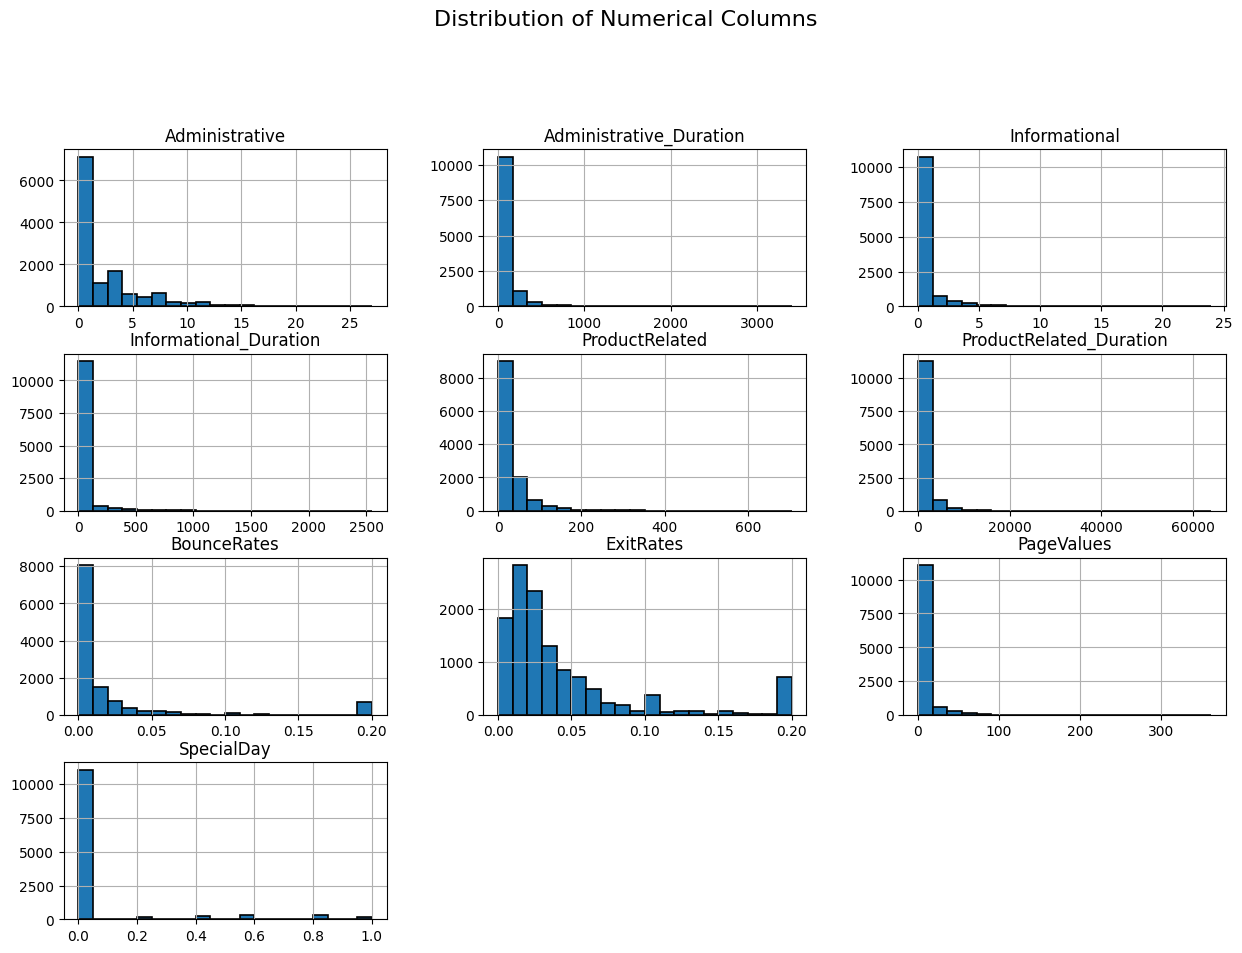

In [9]:
# Distribution of numerical columns
numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                     'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(15, 10))
df[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black', linewidth=1.2)
plt.suptitle('Distribution of Numerical Columns', x=0.5, y=1.02, fontsize=16)
plt.show()

In [10]:
# Inicializar el LabelEncoder
label_encoder = LabelEncoder()
# Aplicar label encoding a la columna 'Month'
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])

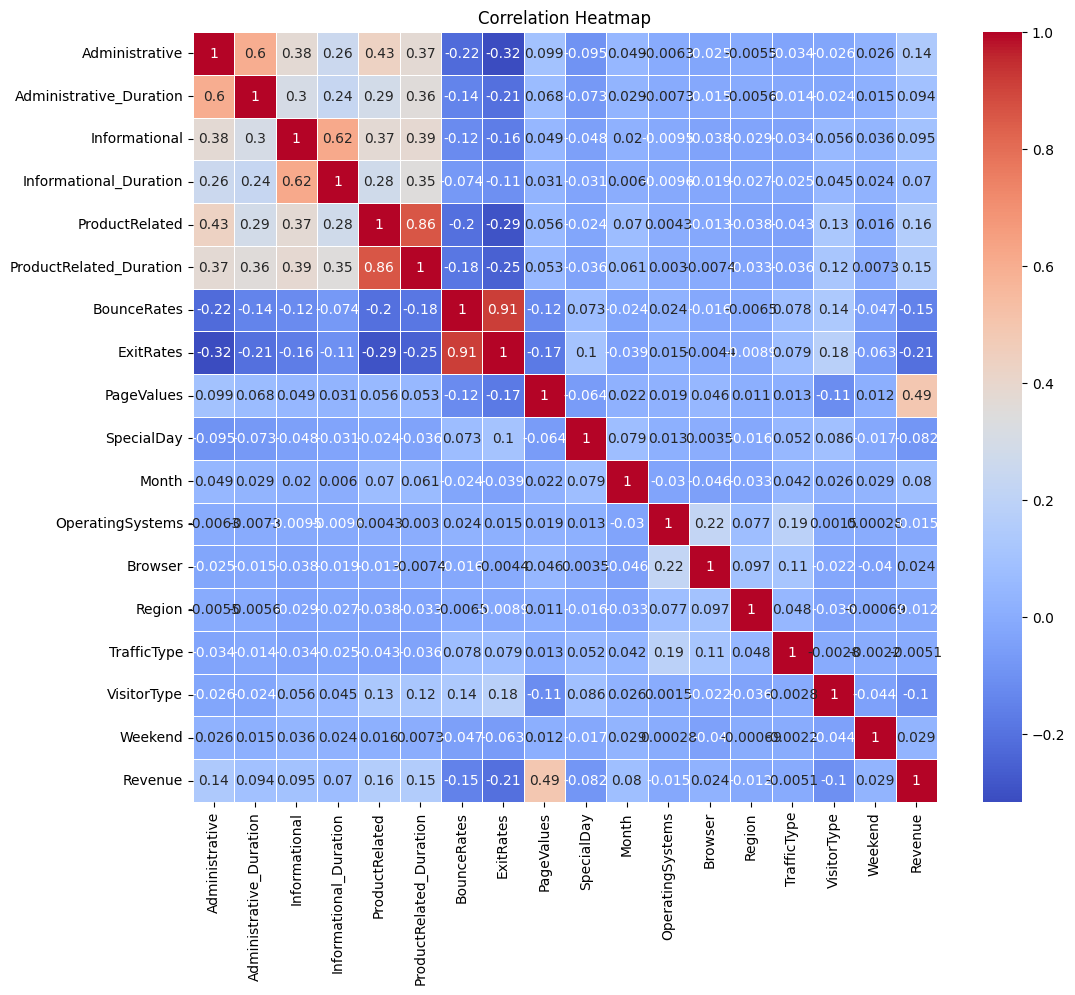

In [11]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

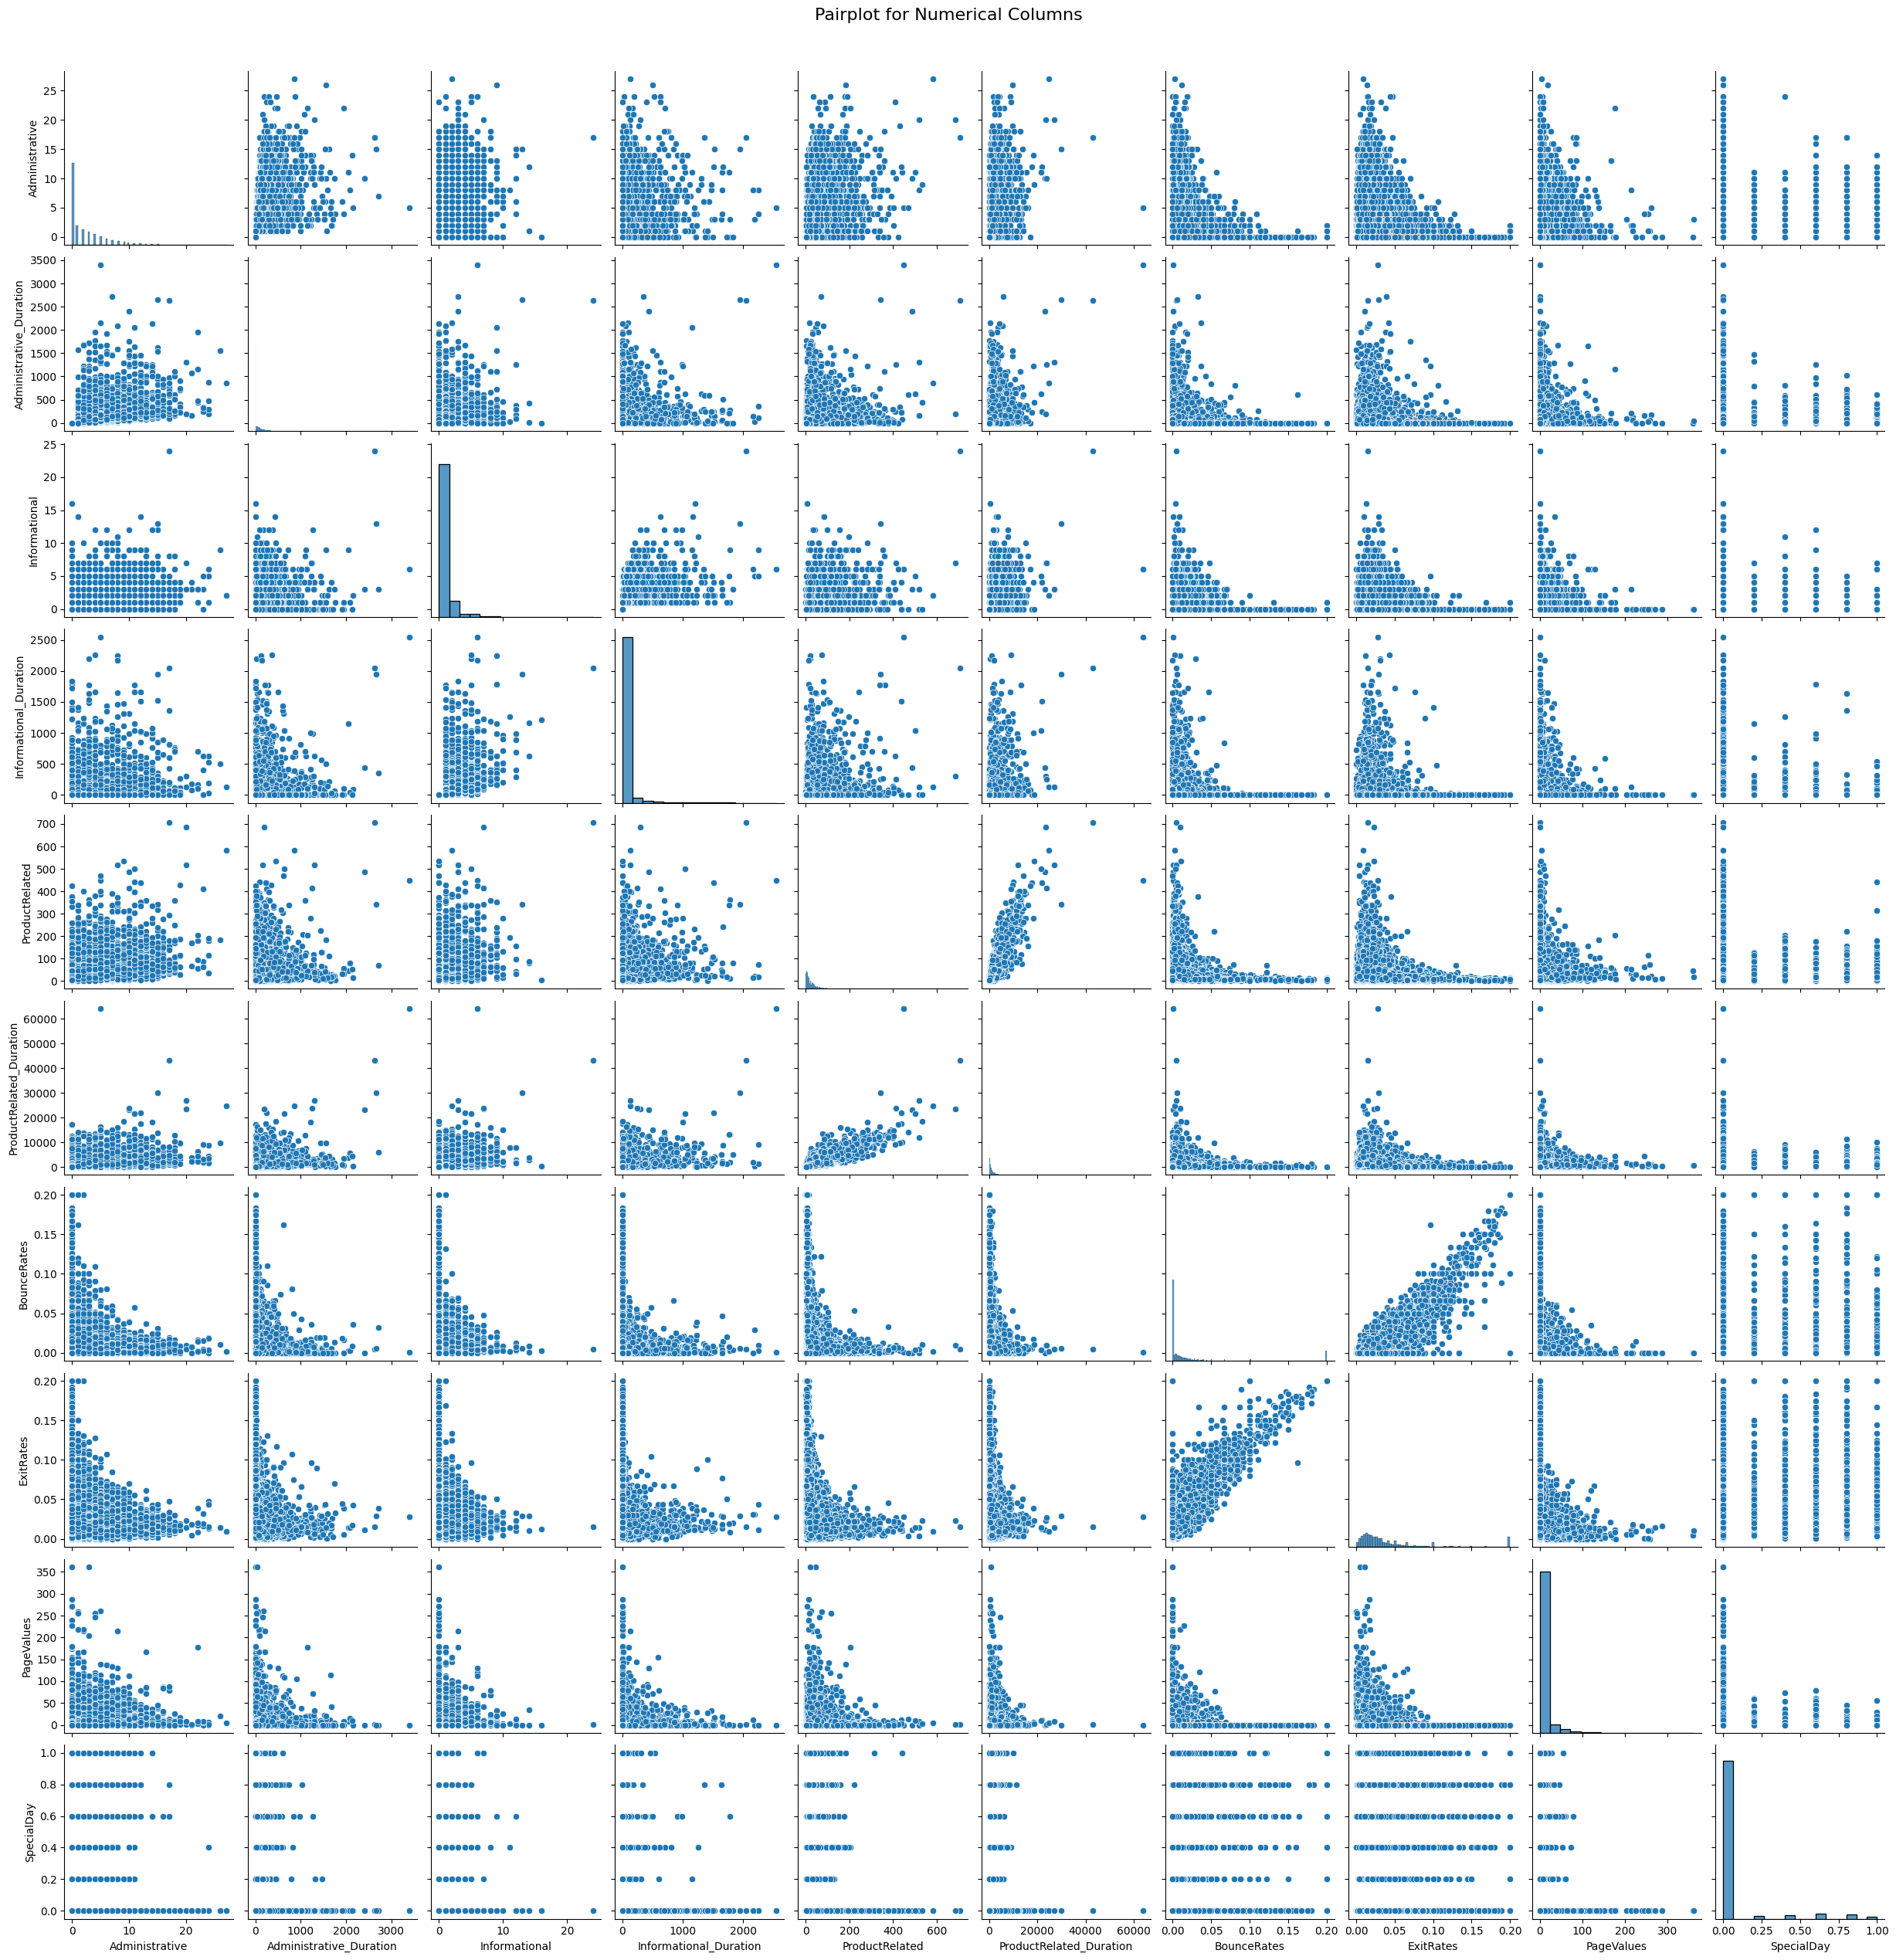

In [12]:
# Pairplot for numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot for Numerical Columns', x=0.5, y=1.02, fontsize=16)
plt.show()

/var/folders/w8/glwt8vg93811vyrtgwqst1ph0000gn/T/ipykernel_10815/1422999160.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')
/var/folders/w8/glwt8vg93811vyrtgwqst1ph0000gn/T/ipykernel_10815/1422999160.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')
/var/folders/w8/glwt8vg93811vyrtgwqst1ph0000gn/T/ipykernel_10815/1422999160.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')
/var/folders/w8/glwt8vg93811vyrtgwqst1ph000

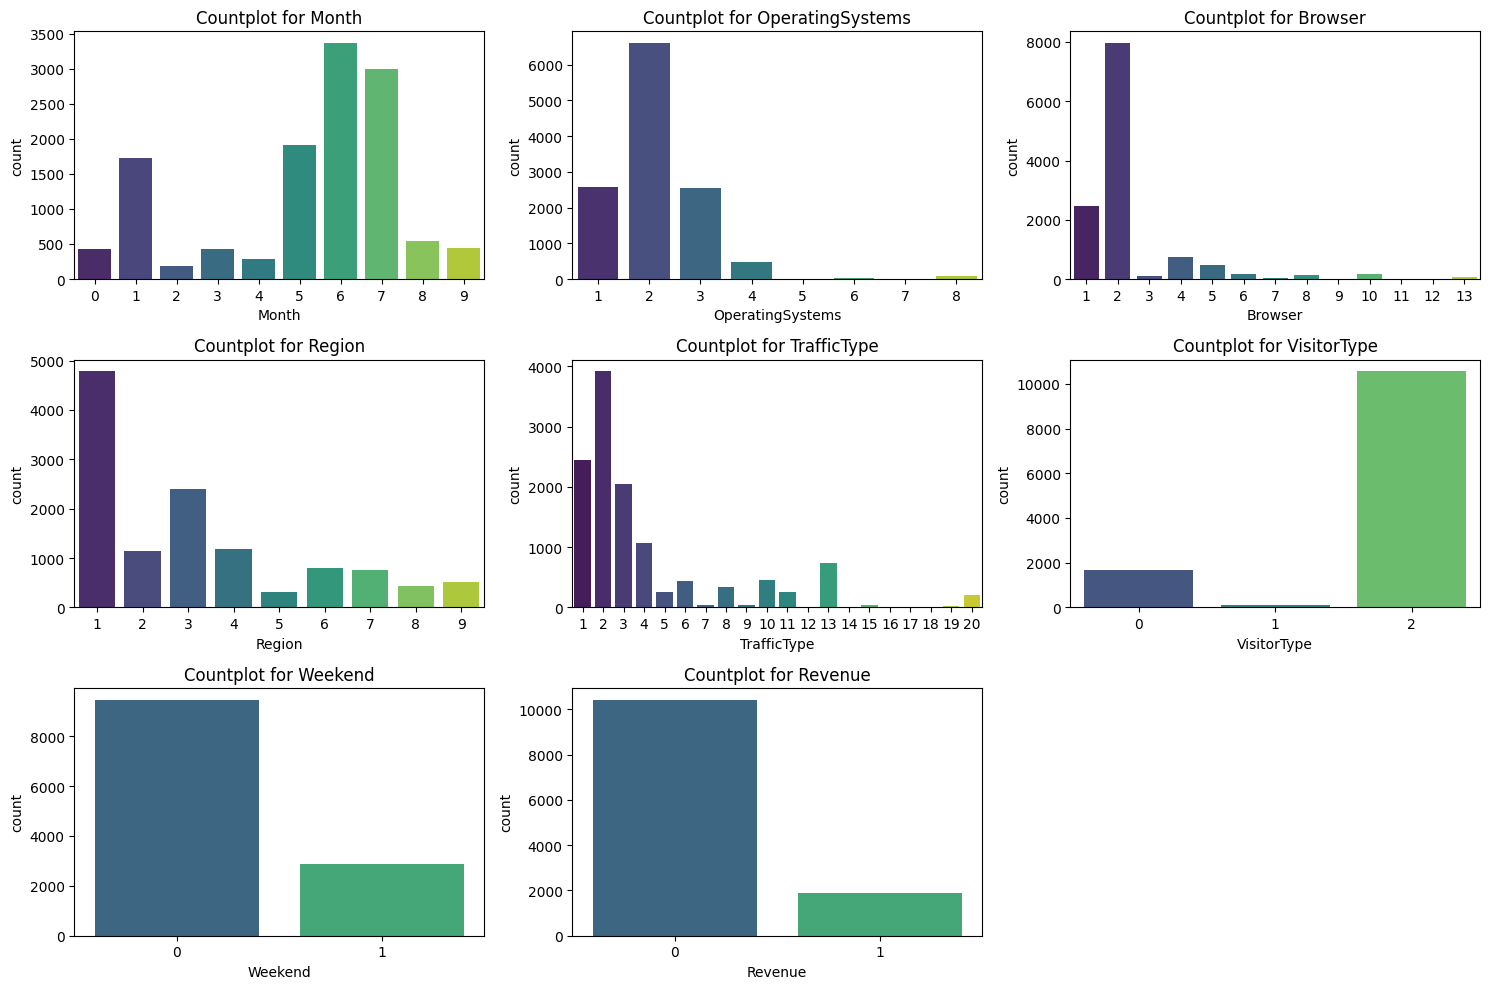

In [13]:
# Boxplots for categorical columns
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()


In [14]:
# Convert categorical columns to numerical using one-hot encoding
#df_encoded = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)


In [15]:
# Separate features (X) and target variable (y)
X = df.drop('Revenue', axis=1)  # Assuming 'Revenue_True' is the encoded target column
y = df['Revenue']


In [16]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)


RandomForestClassifier(random_state=42)

In [17]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns


In [18]:
for col, score in zip(feature_names, feature_importances):
    print(f"{col} : {score}")

Administrative : 0.04114726015110878
Administrative_Duration : 0.058472945549148794
Informational : 0.01713706682299589
Informational_Duration : 0.02674839554616177
ProductRelated : 0.07412503611206678
ProductRelated_Duration : 0.08812785873157247
BounceRates : 0.05804635601513885
ExitRates : 0.08769091481931386
PageValues : 0.382280677625728
SpecialDay : 0.003340178538184323
Month : 0.04323664022168753
OperatingSystems : 0.017241917912024673
Browser : 0.018625666189684927
Region : 0.031031962954785816
TrafficType : 0.031247806903210443
VisitorType : 0.011274852756009101
Weekend : 0.01022446315117799


In [19]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)



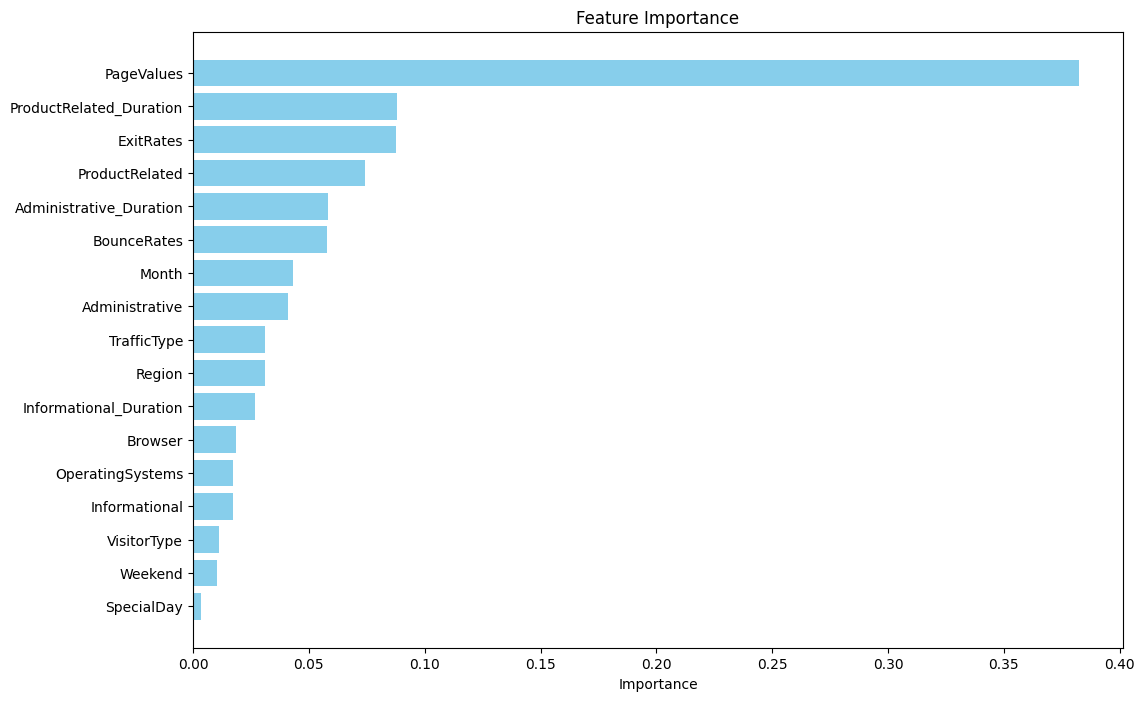

In [20]:
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [21]:
# Select columns of interest
selected_columns = ['PageValues', 'ProductRelated_Duration', 'ExitRates', 'Revenue']

# Extract subset of data with selected columns
df_selected = df[selected_columns]

# Separate features (X) and target variable (y)
X = df_selected.drop('Revenue', axis=1)
y = df_selected['Revenue']



In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
print("Distribution of target variable after ORIGINAL:")
print(df["Revenue"].value_counts())

Distribution of target variable after ORIGINAL:
Revenue
0    10422
1     1908
Name: count, dtype: int64


In [24]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now X_resampled and y_resampled contain the balanced data with SMOTE

# If you want to see the distribution of the target variable after applying SMOTE
print("Distribution of target variable after SMOTE:")
print(y_resampled.value_counts())

Distribution of target variable after SMOTE:
Revenue
0    8367
1    8367
Name: count, dtype: int64


In [25]:
df_smoted = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)

In [26]:
def red_neuronal(df):
    # Separate features (X) and target variable (y)
    X = df.drop('Revenue', axis=1)
    y = df['Revenue']
    y = to_categorical(y)
    # Split the original data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Standardize features for the neural network
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Define a simple neural network model
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(2, activation='softmax')
    ])
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model on the original dataset
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    # return model
    return model, history

In [27]:
# modelo entrenado con dataframe smoted
model_smoted, history_smoted = red_neuronal(df_smoted)
model_original, history_original = red_neuronal(df[['PageValues', 'ProductRelated_Duration', 'ExitRates', 'Revenue']])

Epoch 1/10
247/247 [==============================] - 2s 4ms/step - loss: 0.3185 - accuracy: 0.8870 - val_loss: 0.2873 - val_accuracy: 0.8839
Epoch 2/10
247/247 [==============================] - 1s 4ms/step - loss: 0.2563 - accuracy: 0.8960 - val_loss: 0.2823 - val_accuracy: 0.8819
Epoch 3/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.8977 - val_loss: 0.2826 - val_accuracy: 0.8829
Epoch 4/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.8976 - val_loss: 0.2800 - val_accuracy: 0.8849
Epoch 5/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.8985 - val_loss: 0.2855 - val_accuracy: 0.8880
Epoch 6/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2498 - accuracy: 0.8974 - val_loss: 0.2922 - val_accuracy: 0.8855
Epoch 7/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2499 - accuracy: 0.9008 - val_loss: 0.2817 - val_accuracy: 0.8839
Epoch 

In [33]:
def metricas(model, history):
    pred_train = np.argmax(model.predict(X_train))
    # Asume que y_train está one-hot encoded y necesitas convertirlo a etiquetas simples
    # Si y_train es un vector 1D de etiquetas, lo utilizas directamente
    pred_train = np.argmax(model.predict(X_train), axis=1)
    print(classification_report(y_train, pred_train))
    print(f'ROC AUC del modelo: {roc_auc_score(y_train,pred_train)}')
    # Define el tamaño de la figura y crea una matriz de subgráficos con 1 fila y 2 columnas
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    # Crea la matriz de confusión en la primera columna
    sns.heatmap(confusion_matrix(y_train, pred_train), annot=True, fmt='d', ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('Predicted Labels')
    ax[0].set_ylabel('True Labels')
    # Plotea 'loss' y 'val_loss' en la segunda columna
    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend(loc='upper right')
    # Muestra los gráficos
    plt.tight_layout()
    plt.show()

309/309 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.11      0.19      8367
           1       0.16      0.98      0.28      1497

    accuracy                           0.24      9864
   macro avg       0.57      0.54      0.24      9864
weighted avg       0.85      0.24      0.20      9864

ROC AUC del modelo: 0.5425675062327355


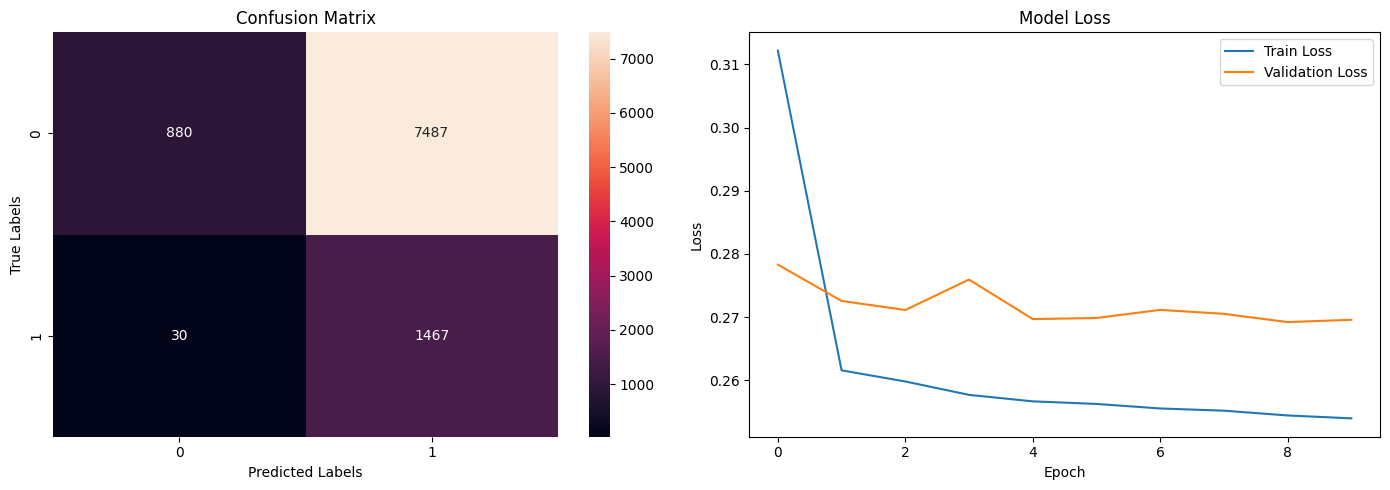

In [34]:
metricas(model_original, history_original)

309/309 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8367
           1       0.84      0.19      0.31      1497

    accuracy                           0.87      9864
   macro avg       0.86      0.59      0.62      9864
weighted avg       0.87      0.87      0.83      9864

ROC AUC del modelo: 0.5910809308350177


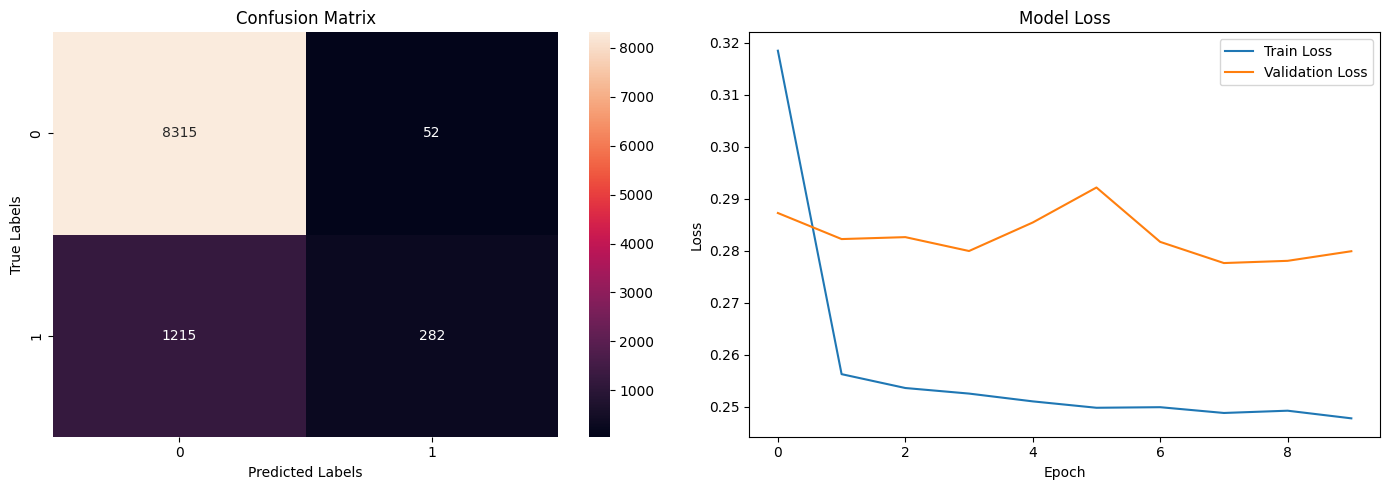

In [35]:
metricas(model_smoted, history_smoted)